Select an option:
1. dataset from 25-aug to 31-aug
2. dataset from 25-aug to 7-sep
3. dataset from 25-aug to 14-sep
Enter the NIFTY50 dataset3
    calc_call_price  given_call  calc_put_price  given_put
0        267.931752      379.00       33.120721      86.00
1        181.504577      304.05       56.730581     113.05
2        149.840281      279.40       68.367279     121.30
3        114.927896      242.40       91.957412     147.50
4         86.041686      210.15      114.743849     167.90
5         65.645256      186.70      140.575387     190.00
6         48.859470      164.35      171.227926     216.75
7         23.775104      116.85      205.793991     239.75
8         20.769546      113.40      237.578538     268.10
9         12.764369       93.05      276.901029     300.90
10         8.397814       79.35      313.547827     323.40
11         4.889803       64.60      368.771615     392.00
12         1.652729       43.45      444.332990     421.30
13         0.420229       26.70

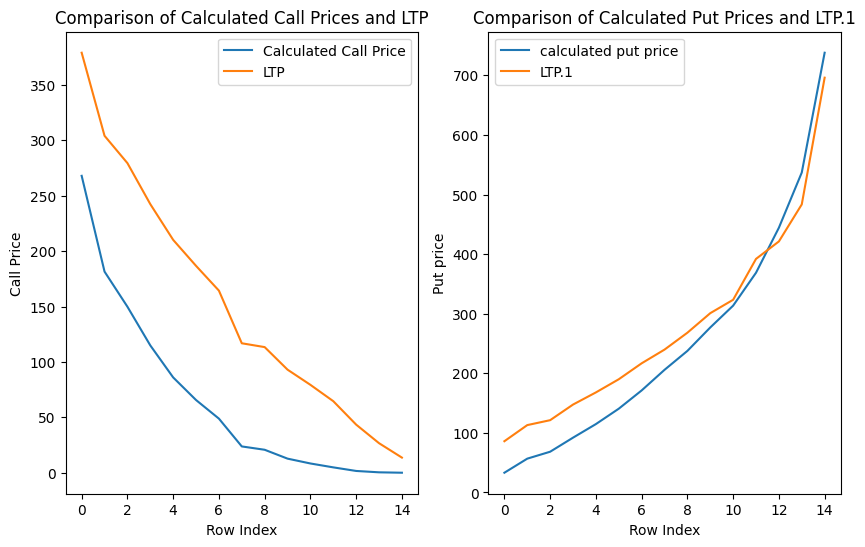

In [ ]:
from mibian import BS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get user input for options
print("Select an option:")
print("1. dataset from 25-aug to 31-aug")
print("2. dataset from 25-aug to 7-sep")
print("3. dataset from 25-aug to 14-sep")
choice = input("Enter the NIFTY50 dataset")

# Perform actions based on user's choice
if choice == '1':
    file_path = '3.csv'  # Replace with your actual file path for Option 1
elif choice == '2':
    file_path = '2.csv'
elif choice == '3':
    file_path = '1.csv'  # Replace with your actual file path for Option 2
else:
    print("Invalid choice")
    exit()

# Read the selected file into a DataFrame
import pandas as pd
df = pd.read_csv(file_path)

#filter-out the data where Iv and ltp is not given
filtered_df = df[(df['LTP'] != '-') & (df['LTP.1'] != '-') & (df['IV']!='-') & (df['IV.1']!='-')]
filtered_df.reset_index(drop=True, inplace=True)

data=[]
data3=[]
a = filtered_df.shape[0]


#calculate Bs model for call price and put price
for i in range (0,a,1):
    S = 19265.80     # Current stock price (obtained from another source)
    K = float(filtered_df['STRIKE'][i].replace(',', '')) # Strike price
    T = 6     # Time to expiry in years
    r = 0.10     # Risk-free interest rate
    sigma = float(filtered_df['IV'][i])
    sigma2 = float(filtered_df['IV.1'][i]) # Volatility
    call_option = BS([S, K, r, T], volatility=sigma)
    put_option = BS([S,K,r,T], volatility=sigma2 )
    calculated_call_price = call_option.callPrice
    calculated_put_price = put_option.putPrice
    data.append(calculated_call_price)
    data3.append(calculated_put_price)

data2=[]
data4=[]

#loading data into data2 data4 array original
for j in range (0,a,1):
    w= float(filtered_df['LTP'][j].replace(',', ''))
    d= float(filtered_df['LTP.1'][j].replace(',', ''))
    data2.append(w)
    data4.append(d)


#calculation of mean error_call price
mean_error = np.mean(abs(np.array(data2) - np.array(data)))
squared_error = np.mean((np.array(data2) - np.array(data)) ** 2)

#calculation of mean error_put price
mean_error1  = np.mean(abs(np.array(data3) - np.array(data4)))
squared_error2= np.mean((np.array(data3) - np.array(data4)) ** 2)


#loading data into pd dataframe
data_dict = {'calc_call_price': data, 'given_call': data2, 'calc_put_price': data3, 'given_put': data4}



combined_df = pd.DataFrame(data_dict)
print(combined_df)

#printing the errors
print(f"Mean Error of call_price: {mean_error:.2f}")
print(f"Squared Error of call_price: {squared_error:.2f}")
print(f"Mean Error of put_price: {mean_error1:.2f}")
print(f"Squared Error of put_price: {squared_error2:.2f}")

#subplotting the calculated and given datasets
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(filtered_df.index, data, label='Calculated Call Price')
plt.plot(filtered_df.index, data2, label='LTP')
plt.xlabel('Row Index')
plt.ylabel('Call Price')
plt.title('Comparison of Calculated Call Prices and LTP')
plt.legend()

#subplotting the calculated and given datasets
plt.subplot(1, 2, 2)
plt.plot(filtered_df.index, data3, label='calculated put price')
plt.plot(filtered_df.index, data4, label='LTP.1')
plt.xlabel('Row Index')
plt.ylabel('Put price')
plt.title('Comparison of Calculated Put Prices and LTP.1')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# Convert lists to numpy arrays
calc_call = np.array(data)
actual_call = np.array(data2)
calc_put = np.array(data3)
actual_put = np.array(data4)

# Mean Absolute Percentage Error (MAPE)
mape_call = np.mean(np.abs((calc_call - actual_call)/actual_call))*100
mape_put = np.mean(np.abs((calc_put - actual_put)/actual_put))*100

# Root Mean Squared Error (RMSE)
rmse_call = np.sqrt(np.mean((calc_call - actual_call)**2))
rmse_put = np.sqrt(np.mean((calc_put - actual_put)**2))

# Paired t-test
t_call, p_call = ttest_rel(calc_call, actual_call)
t_put, p_put = ttest_rel(calc_put, actual_put)

# Correlation coefficient
corr_call = np.corrcoef(calc_call, actual_call)[0,1]
corr_put = np.corrcoef(calc_put, actual_put)[0,1]

# Print results
print(f"MAPE Call: {mape_call:.2f}%")
print(f"MAPE Put : {mape_put:.2f}%")
print(f"RMSE Call: {rmse_call:.2f}")
print(f"RMSE Put : {rmse_put:.2f}")
print(f"Correlation Call: {corr_call:.2f}")
print(f"Correlation Put : {corr_put:.2f}")


MAPE Call: 72.43%
MAPE Put : 22.42%
RMSE Call: 96.16
RMSE Put : 42.92
Correlation Call: 0.97
Correlation Put : 1.00


In [ ]:
!pip install mibian

  Preparing metadata (setup.py) ... done
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4024 sha256=f4044b603f5f43b633f5afe793c16588b392fb3c9868069490abd5087249fb8a
  Stored in directory: /root/.cache/pip/wheels/b2/71/71/a9ff30d4851199bf1efabdda83809623cf181762214ae6b7c7
Successfully built mibian


In [ ]:
from scipy.stats import wilcoxon

# Wilcoxon Signed-Rank Test for statistical significance
w_call, p_call = wilcoxon(calc_call - actual_call)
w_put, p_put = wilcoxon(calc_put - actual_put)

# Print results
print(f"MAPE Call: {mape_call:.2f}%")
print(f"MAPE Put : {mape_put:.2f}%")
print(f"RMSE Call: {rmse_call:.2f}")
print(f"RMSE Put : {rmse_put:.2f}")
print(f"Correlation Call: {corr_call:.2f}")
print(f"Correlation Put : {corr_put:.2f}")
print(f"Wilcoxon test p-value (Call): {p_call:.4f}")
print(f"Wilcoxon test p-value (Put): {p_put:.4f}")


MAPE Call: 72.43%
MAPE Put : 22.42%
RMSE Call: 96.16
RMSE Put : 42.92
Correlation Call: 0.97
Correlation Put : 1.00
Wilcoxon test p-value (Call): 0.0001
Wilcoxon test p-value (Put): 0.0302


Historical volatility over period: 21.34%
                       Date Category        Spot  Strike  Market_Price  \
0 2025-06-02 00:00:00-04:00      ITM  201.471344   110.0        129.25   
1 2025-06-02 00:00:00-04:00      ITM  201.471344   130.0        106.45   
2 2025-06-02 00:00:00-04:00      ITM  201.471344   140.0         93.65   
3 2025-06-02 00:00:00-04:00      ITM  201.471344   150.0         90.35   
4 2025-06-02 00:00:00-04:00      ITM  201.471344   160.0         77.89   

     BS_Price  Deviation  
0  103.871598  25.378402  
1   86.126191  20.323809  
2   77.253520  16.396480  
3   68.381312  21.968688  
4   59.513115  18.376885  


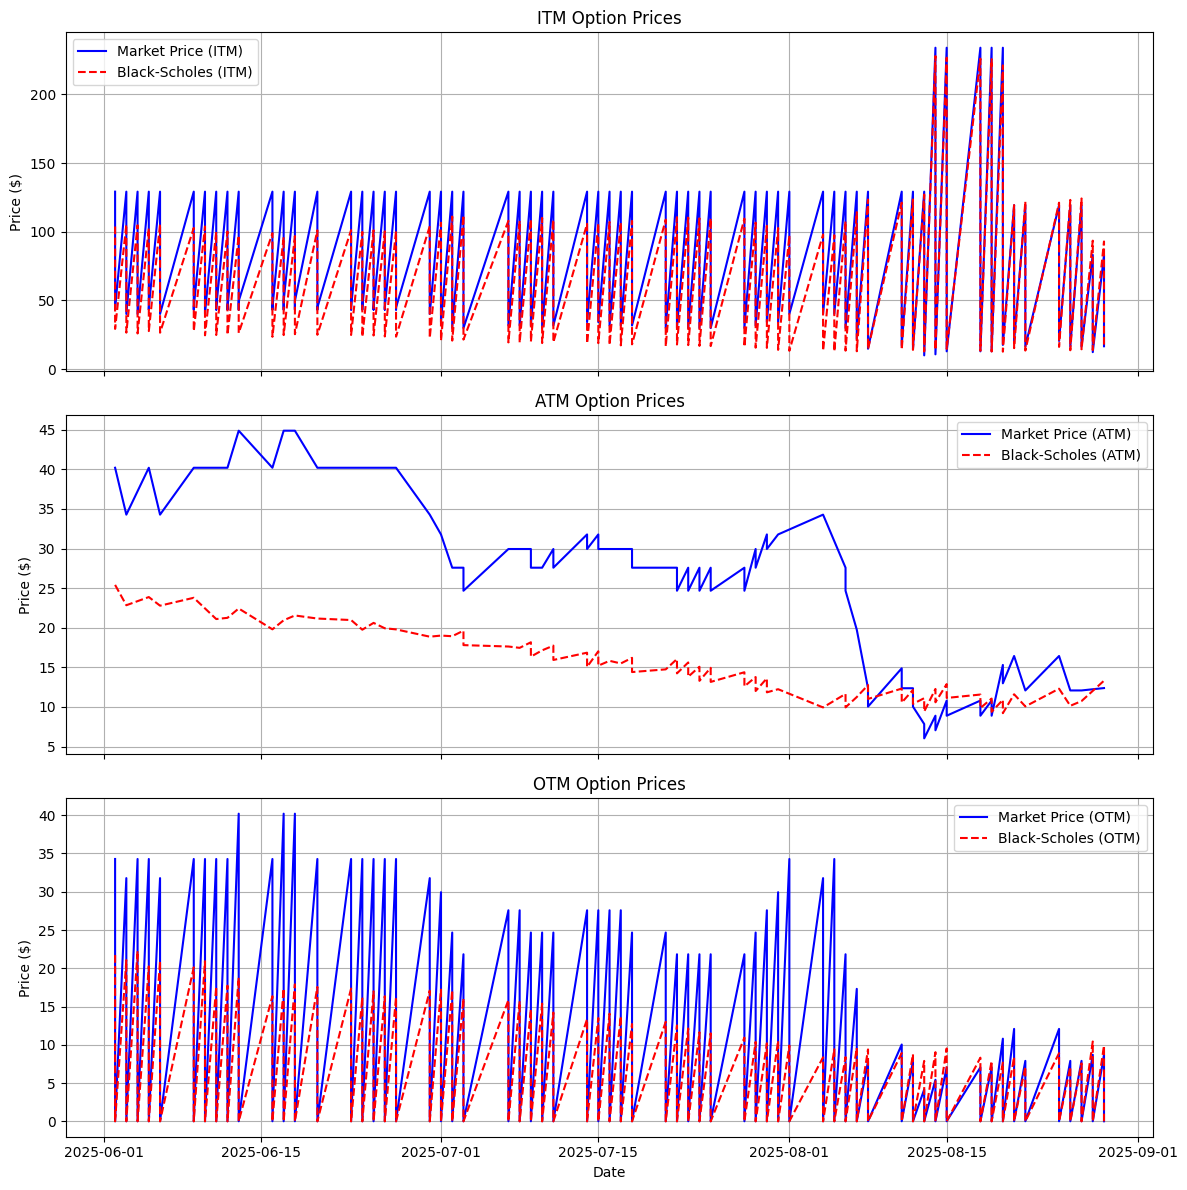

In [ ]:
import yfinance as yf
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt


ticker = "AAPL"
start = "2025-06-01"
end = "2025-08-31"
risk_free_rate = 0.428
atm_threshold = 0.01   # 1% for ATM


stock = yf.Ticker(ticker)
hist = stock.history(start=start, end=end)
spot_prices = hist['Close']


returns = np.log(spot_prices / spot_prices.shift(1)).dropna()
hist_vol = returns.std() * np.sqrt(252)  # annualized volatility
print(f"Historical volatility over period: {hist_vol:.2%}")


expiry_dates = [pd.to_datetime(exp).date() for exp in stock.options]

def black_scholes_call(S, K, T, r, sigma):
    if T <= 0:
        return max(0.0, S - K)  # at expiry
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)


results = []

for date in hist.index:
    current_date = date.date()
    S = float(spot_prices.loc[date])


    valid_exps = [exp for exp in expiry_dates if (exp - current_date).days >= 30]
    if not valid_exps:
        continue
    expiry = min(valid_exps)
    expiry_str = expiry.strftime('%Y-%m-%d')


    try:
        chain = stock.option_chain(expiry_str)
    except Exception:
        continue
    calls = chain.calls
    if calls.empty:
        continue


    for idx, row in calls.iterrows():
        K = row['strike']
        market_price = row['lastPrice']
        T = (expiry - current_date).days / 365

        if market_price <= 0:
            continue


        if abs(K - S)/S <= atm_threshold:
            category = "ATM"
        elif K < S:
            category = "ITM"
        else:
            category = "OTM"


        bs_price = black_scholes_call(S, K, T, risk_free_rate, hist_vol)
        deviation = market_price - bs_price

        results.append([date, category, S, K, market_price, bs_price, deviation])


df = pd.DataFrame(results, columns=['Date','Category','Spot','Strike','Market_Price','BS_Price','Deviation'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())


categories = ['ITM', 'ATM', 'OTM']
fig, axs = plt.subplots(len(categories), 1, figsize=(12, 12), sharex=True)

for i, cat in enumerate(categories):
    df_cat = df[df['Category'] == cat]
    axs[i].plot(df_cat['Date'], df_cat['Market_Price'], label=f"Market Price ({cat})", color="blue")
    axs[i].plot(df_cat['Date'], df_cat['BS_Price'], label=f"Black-Scholes ({cat})", color="red", linestyle="--")
    axs[i].set_title(f"{cat} Option Prices")
    axs[i].set_ylabel("Price ($)")
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import wilcoxon

for cat in ['ITM','ATM','OTM']:
    deviations = df[df['Category']==cat]['Deviation']
    stat, p_val = wilcoxon(deviations)
    print(f"{cat} Options: Wilcoxon stat={stat}, p-value={p_val:.4f}")


ITM Options: Wilcoxon stat=92014.0, p-value=0.0000
ATM Options: Wilcoxon stat=148.0, p-value=0.0000
OTM Options: Wilcoxon stat=839054.0, p-value=0.0000


In [ ]:
for cat in ['ITM','ATM','OTM']:
    df_cat = df[df['Category']==cat]
    corr = df_cat['Market_Price'].corr(df_cat['BS_Price'])
    print(f"{cat} Options: Pearson correlation = {corr:.3f}")


ITM Options: Pearson correlation = 0.968
ATM Options: Pearson correlation = 0.711
OTM Options: Pearson correlation = 0.919


In [1]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# for cat in ['ITM','ATM','OTM']:
#     df_cat = df[df['Category']==cat]
#     mae = mean_absolute_error(df_cat['Market_Price'], df_cat['BS_Price'])
#     rmse = np.sqrt(mean_squared_error(df_cat['Market_Price'], df_cat['BS_Price']))
#     print(f"{cat} Options: MAE={mae:.2f}, RMSE={rmse:.2f}")


In [ ]:
from scipy.stats import shapiro

for cat in ['ITM','ATM','OTM']:
    deviations = df[df['Category']==cat]['Deviation']
    stat, p = shapiro(deviations)
    print(f"{cat} Options: Shapiro-Wilk p-value={p:.4f}")


ITM Options: Shapiro-Wilk p-value=0.0000
ATM Options: Shapiro-Wilk p-value=0.0000
OTM Options: Shapiro-Wilk p-value=0.0000


In [ ]:
import numpy as np
from scipy.stats import wilcoxon
from sklearn.metrics import mean_absolute_error, mean_squared_error

for cat in ['ITM', 'ATM', 'OTM']:
    df_cat = df[df['Category'] == cat]

    # Wilcoxon test
    stat, p_val = wilcoxon(df_cat['Deviation'])

    # Pearson correlation
    corr = df_cat['Market_Price'].corr(df_cat['BS_Price'])

    # MAE and RMSE
    mae = mean_absolute_error(df_cat['Market_Price'], df_cat['BS_Price'])
    rmse = np.sqrt(mean_squared_error(df_cat['Market_Price'], df_cat['BS_Price']))

    # Print results
    print(f"{cat} Options:")
    print(f"  Wilcoxon p-value = {p_val:.4f}")
    print(f"  Pearson correlation = {corr:.3f}")
    print(f"  MAE = {mae:.2f}, RMSE = {rmse:.2f}\n")


ITM Options:
  Wilcoxon p-value = 0.0000
  Pearson correlation = 0.976
  MAE = 11.29, RMSE = 14.02

ATM Options:
  Wilcoxon p-value = 0.0000
  Pearson correlation = 0.841
  MAE = 11.09, RMSE = 13.02

OTM Options:
  Wilcoxon p-value = 0.0000
  Pearson correlation = 0.930
  MAE = 2.81, RMSE = 5.55



In [ ]:
import numpy as np
from scipy.stats import wilcoxon

for cat in ['ITM', 'ATM', 'OTM']:
    df_cat = df[df['Category'] == cat]

    # Wilcoxon test
    stat, p_val = wilcoxon(df_cat['Deviation'])

    # Pearson correlation
    corr = df_cat['Market_Price'].corr(df_cat['BS_Price'])

    # MAPE calculation
    mape = np.mean(np.abs((df_cat['Market_Price'] - df_cat['BS_Price']) / df_cat['Market_Price'])) * 100

    # Print results
    print(f"{cat} Options:")
    print(f"  Wilcoxon p-value = {p_val:.4f}")
    print(f"  Pearson correlation = {corr:.3f}")
    print(f"  MAPE = {mape:.2f}%\n")


ITM Options:
  Wilcoxon p-value = 0.0000
  Pearson correlation = 0.976
  MAPE = 18.00%

ATM Options:
  Wilcoxon p-value = 0.0000
  Pearson correlation = 0.841
  MAPE = 38.40%

OTM Options:
  Wilcoxon p-value = 0.0000
  Pearson correlation = 0.930
  MAPE = 257.40%

